# Business case: walk or Run

#### Here in this business case we have to check wether LSTM model will predict the accurate activity after using training data.

- We all know that during that walking and running, there are movemnts of our arms. So, uasge of accelerometer and Gyrometer needs to measure the reading through sensors. Here we will see the all data which are collected from these instuments and build a LSTM neural network model for prediction of class and test the accuracy of the model.

![WalkRun.jpg](attachment:WalkRun.jpg)

## Importing the required libraries

In [ ]:
## Basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split

## For MOdel Building by LSTM model
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Flatten

In [ ]:
data=pd.read_csv('walkrun.csv')
data

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


## Domain Analysis

- Wrist: column shows that both right and left wrist are mentioned
- activity: Activity classifies as walking and running
- date and time are also mentioned
- Username: Person whose readings are measured and mentioned in the dataset
- Data which are derived from the accelerometer and gyrometer are mentioned

## Basic check

In [ ]:
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [ ]:
data.tail()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755
88587,2017-7-9,20:9:16:117410004,viktor,0,0,0.3140,-0.8008,-0.0911,0.1183,1.0850,1.2814


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [ ]:
data.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


- We can see there is no any corrupt data in this dataset

In [ ]:
data.describe(include='O')

,date,time,username
count,88588,88588,88588
unique,12,88588,1
top,2017-7-16,13:51:15:847724020,viktor
freq,20480,1,88588


- It shows there is only one person whom data is derived for walking and running activity.

In [ ]:
data.date.value_counts()

2017-7-16    20480
2017-7-17    11365
2017-7-6     11357
2017-7-15     7934
2017-7-9      7788
2017-7-11     6696
2017-7-10     4337
2017-7-1      4201
2017-6-30     3992
2017-7-2      3933
2017-7-7      3280
2017-7-4      3225
Name: date, dtype: int64

In [ ]:
data.activity.value_counts()

1    44365
0    44223
Name: activity, dtype: int64

In [ ]:
data.wrist.value_counts()

1    46258
0    42330
Name: wrist, dtype: int64

In [ ]:
data.time.value_counts()

13:51:15:847724020    1
19:34:29:79468011     1
19:34:37:706730008    1
19:34:37:506595015    1
19:34:37:307013988    1
                     ..
14:45:22:828522980    1
14:45:22:629136979    1
14:45:22:429431974    1
14:45:22:229138970    1
20:9:16:117410004     1
Name: time, Length: 88588, dtype: int64

## Data Preprocessing

In [ ]:
## Let's check wether data has any null values in  the columns

data.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [ ]:
## Let's check wether data has any duplicate entries.

data.duplicated().sum()

0

In [ ]:
def duration_convert(time):
    # Split the time by ':' and extract hours, minutes, seconds, and milliseconds
    time_parts = time.split(':')

    # Extract hours, minutes, seconds, and milliseconds
    hours = int(time_parts[0])
    minutes = int(time_parts[1])
    seconds = int(time_parts[2])
    miliseconds= int(time_parts[3])

    # Convert the time to total seconds
    total_m_seconds = (hours * 60) + (minutes * 60) + (seconds * 1000) + (miliseconds)


    # Format the duration as 'mm'
    formatted_duration = '{:02d}'.format(total_m_seconds)

    return formatted_duration

# Apply the duration_convert function to the 'time' column and create a new 'duration' column
data['time'] = data['time'].apply(duration_convert)

In [ ]:
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,847742860,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,246964863,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,446253827,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,646137825,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,846758834,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


## Data Visualization

In [ ]:
## We have copy here data tp visualize activity as 'Walking' & 'Running'

Cdata=data.copy()
Cdata

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,847742860,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,246964863,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,446253827,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,646137825,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,846758834,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,317927768,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,517905762,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,717845729,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,917949727,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [ ]:
Cdata.activity=Cdata.activity.map({0:'Walking',1:'Running'})
Cdata.wrist=Cdata.wrist.map({0:'Left',1:'Right'})
Cdata.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,847742860,viktor,Left,Walking,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,246964863,viktor,Left,Walking,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,446253827,viktor,Left,Walking,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,646137825,viktor,Left,Walking,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,846758834,viktor,Left,Walking,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


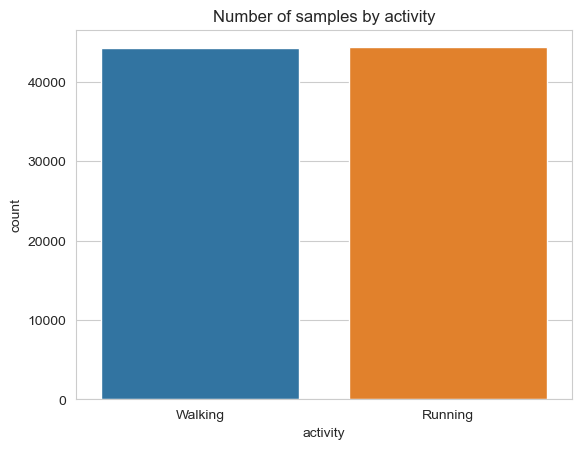

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'activity', data = Cdata)
plt.title('Number of samples by activity')
plt.show()

- Data for Walking and Running almost same

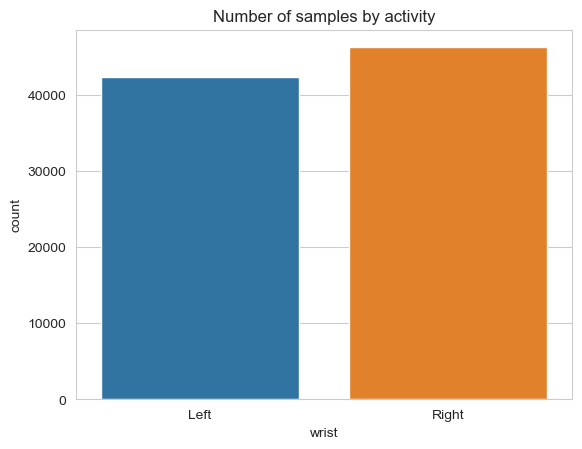

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'wrist', data = Cdata)
plt.title('Number of samples by activity')
plt.show()

- Data measured from Right wrist is more compare with Left wrist

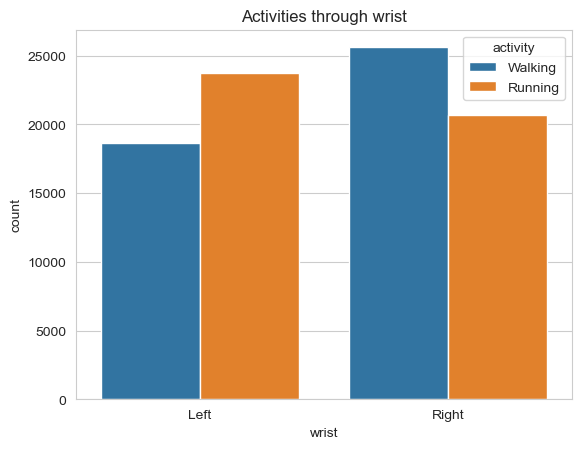

In [ ]:
sns.countplot(x = 'wrist',  hue = 'activity', data = Cdata)
plt.title('Activities through wrist')
plt.show()


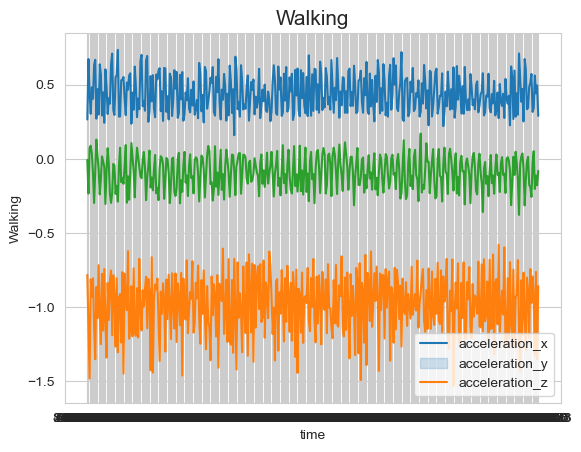

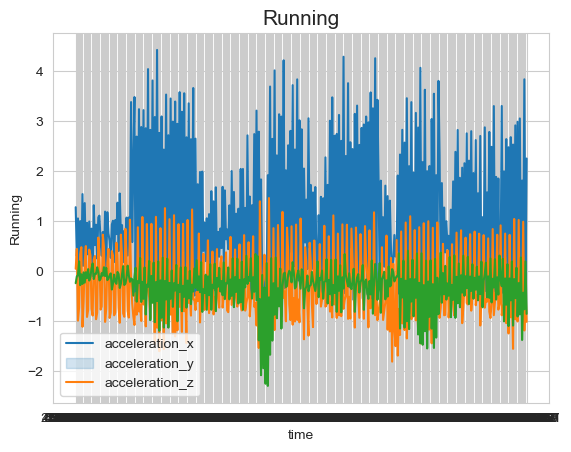

In [ ]:
activities = ['Walking','Running']
for i in activities:
    data2 = Cdata[Cdata['activity'] == i][:400]
    sns.lineplot(y = 'acceleration_x', x = 'time', data = data2)
    sns.lineplot(y = 'acceleration_y', x = 'time', data = data2)
    sns.lineplot(y = 'acceleration_z', x = 'time', data = data2)
    plt.legend(['acceleration_x','acceleration_y','acceleration_z'])
    plt.ylabel(i)
    plt.title(i, fontsize = 15)
    plt.show()


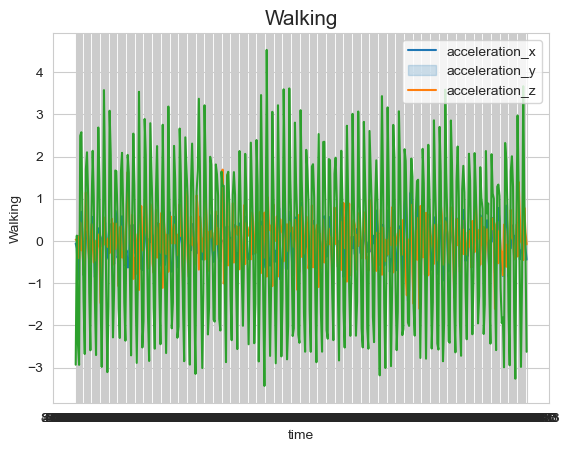

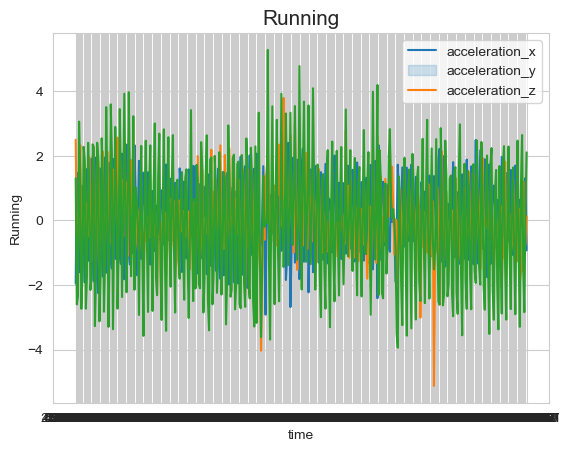

In [ ]:
activities = ['Walking','Running']
for i in activities:
    data2 = Cdata[Cdata['activity'] == i][:400]
    sns.lineplot(y = 'gyro_x', x = 'time', data = data2)
    sns.lineplot(y = 'gyro_y', x = 'time', data = data2)
    sns.lineplot(y = 'gyro_z', x = 'time', data = data2)
    plt.legend(['acceleration_x','acceleration_y','acceleration_z'])
    plt.ylabel(i)
    plt.title(i, fontsize = 15)
    plt.show()

- The signal shows periodic behavior for activities like Walking and running.

In [ ]:
## NOw we drop the columns which are excluded for model training.
data.drop(columns=['username','date','wrist'],axis=0,inplace=True)
data.head()

,time,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,847742860,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,246964863,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,446253827,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,646137825,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,846758834,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


## Preparing Data for LSTM Model

- The LSTM model expects fixed-length sequences as training data. We shall use a familiar method for generating these. Each generated sequence (or window) contains 50 records corresponding to 2.5 secs of activity.

In [ ]:
random_seed = 42
n_time_steps = 50
n_features = 6
step = 10
n_classes = 2
n_epochs = 50
batch_size = 1024
learning_rate = 0.0025
l2_loss = 0.0015
segments = []
labels = []

for i in range(0,  data.shape[0]- n_time_steps, step):

    xs = data['acceleration_x'].values[i: i + 50]

    ys = data['acceleration_y'].values[i: i + 50]

    zs = data['acceleration_z'].values[i: i + 50]

    xg = data['gyro_x'].values[i: i + 50]

    yg = data['gyro_y'].values[i: i + 50]

    zg = data['gyro_z'].values[i: i + 50]

    label = stats.mode(data['activity'][i: i + 50])[0][0]

    segments.append([xs, ys, zs, xg, yg, zg])

    labels.append(label)

labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)


In [ ]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, n_time_steps, n_features)

In [ ]:
reshaped_segments.shape

(8854, 50, 6)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.2, random_state = random_seed)

In [ ]:
model = Sequential()
# RNN layer
model.add(LSTM(units = 128, input_shape = (x_train.shape[1], x_train.shape[2])))
# Dropout layer
model.add(Dropout(0.5))
# Dense layer with ReLu
model.add(Dense(units = 64, activation='relu'))
# Softmax layer
model.add(Dense(y_train.shape[1], activation = 'softmax'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               69120     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 77506 (302.76 KB)
Trainable params: 77506 (302.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model Training & Evaluation

In [ ]:
history = model.fit(x_train, y_train, epochs = n_epochs, validation_split = 0.20, batch_size = batch_size, verbose = 1)

Epoch 1/50
6/6 [==============================] - 11s 1s/step - loss: 0.6648 - accuracy: 0.6788 - val_loss: 0.6101 - val_accuracy: 0.9323
Epoch 2/50
6/6 [==============================] - 5s 886ms/step - loss: 0.5782 - accuracy: 0.9379 - val_loss: 0.4666 - val_accuracy: 0.9901
Epoch 3/50
6/6 [==============================] - 5s 862ms/step - loss: 0.3507 - accuracy: 0.9711 - val_loss: 0.1425 - val_accuracy: 0.9802
Epoch 4/50
6/6 [==============================] - 5s 843ms/step - loss: 0.0869 - accuracy: 0.9839 - val_loss: 0.0359 - val_accuracy: 0.9915
Epoch 5/50
6/6 [==============================] - 5s 878ms/step - loss: 0.0443 - accuracy: 0.9896 - val_loss: 0.0452 - val_accuracy: 0.9866
Epoch 6/50
6/6 [==============================] - 5s 877ms/step - loss: 0.0384 - accuracy: 0.9910 - val_loss: 0.0476 - val_accuracy: 0.9866
Epoch 7/50
6/6 [==============================] - 6s 1s/step - loss: 0.0683 - accuracy: 0.9772 - val_loss: 0.0288 - val_accuracy: 0.9929
Epoch 8/50
6/6 [=========

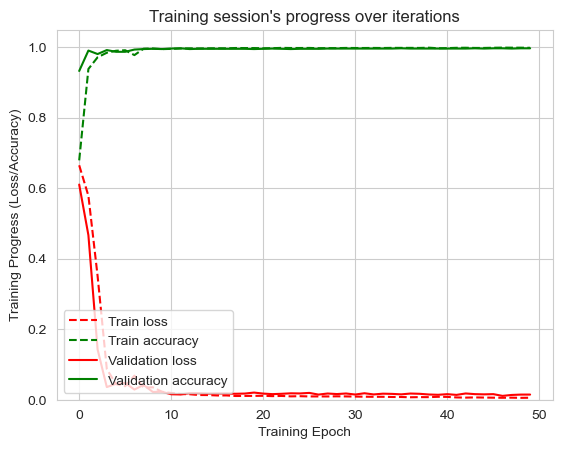

In [ ]:
plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='lower left')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, batch_size = batch_size, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

2/2 [==============================] - 1s 291ms/step - loss: 0.0103 - accuracy: 0.9977
Test Accuracy : 0.9977414011955261
Test Loss : 0.01034584641456604


- we have got over 99% accuracy on the test data with cross-entropy loss equal to 0.010.

56/56 [==============================] - 2s 23ms/step


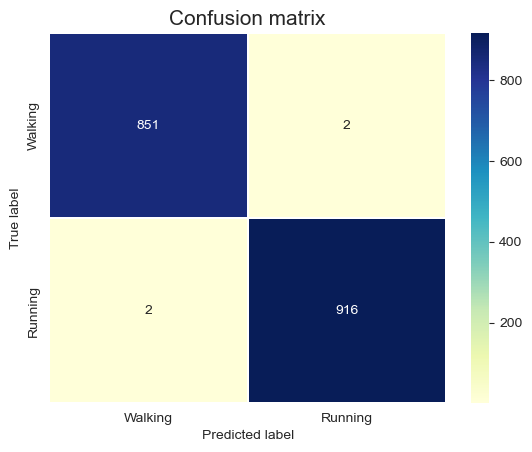

In [ ]:
predictions = model.predict(x_test)
class_labels = ['Walking','Running']
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
cm = confusion_matrix(max_test, max_predictions)
sns.heatmap(cm, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Conclusion

- we have got over 99% accuracy on the test data with cross-entropy loss equal to 0.04. This is shows our LSTM model is fit for classification for the data.

## Challenges Faced

- Data Visualization
- Understanding the data
- Data Preparing for training
- Working with new Machine Learning Model

## Overview of Project¶
               

We started with the raw accelerometer and gyroscope signal data consisting of just 7 relevant features – reading of accelerometer along x, y, and z axes and gyroscoper along x, y, and z the timestamp at which the readings were taken. We trained a simple LSTM network on the raw time-series data. LSTM model learns complex features automatically from the sequential data to be able to predict the class label with high accuracy.By coupling the tri-axial accelerometer data with the data from the tri-axial gyroscope, it can be possible to distinguish between similar classes like Walking and Running with higher accuracy.